Data shape:  (53752, 10)

Data types: 
transaction_id     object
date               object
product_id         object
product_name       object
quantity            int64
unit_price        float64
total_sales       float64
customer_id        object
city               object
loyalty_tier       object
dtype: object
  transaction_id        date product_id              product_name  quantity  \
0        T000001  2023-07-01      P0047  Microsoft Accessories SE         5   
1        T000002  2023-07-01      P0075   Lenovo Smartwatches Max         2   
2        T000003  2023-07-01      P0052    Samsung Accessories SE         3   
3        T000004  2023-07-01      P0038       Samsung Tablets Pro         2   
4        T000005  2023-07-01      P0045         Dell Tablets Mini         1   

   unit_price  total_sales customer_id         city loyalty_tier  
0      855.68      4278.40       C0824      Chicago         Gold  
1     1034.59      2069.18       C0107     New York          New  
2      428.

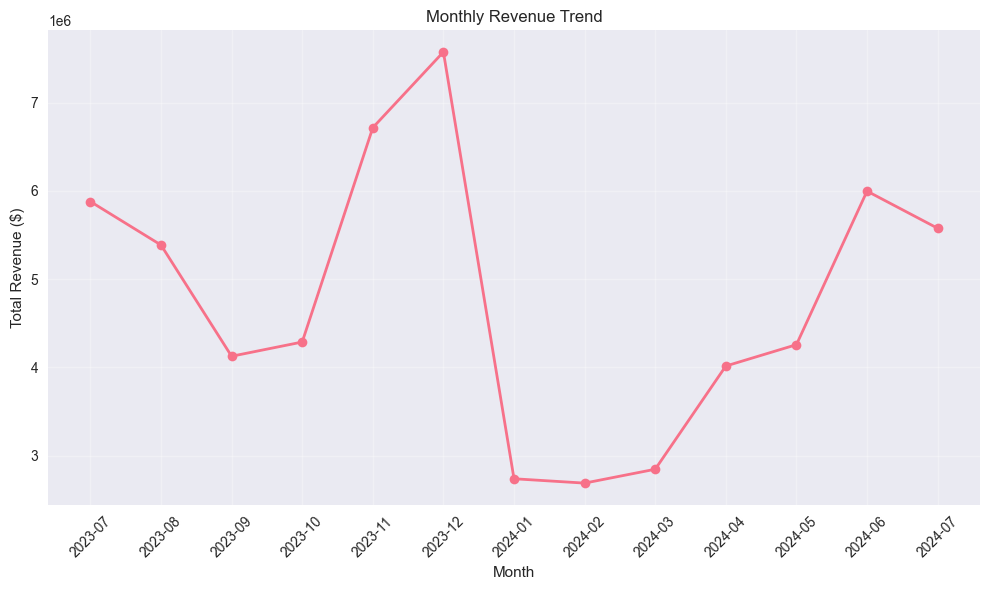

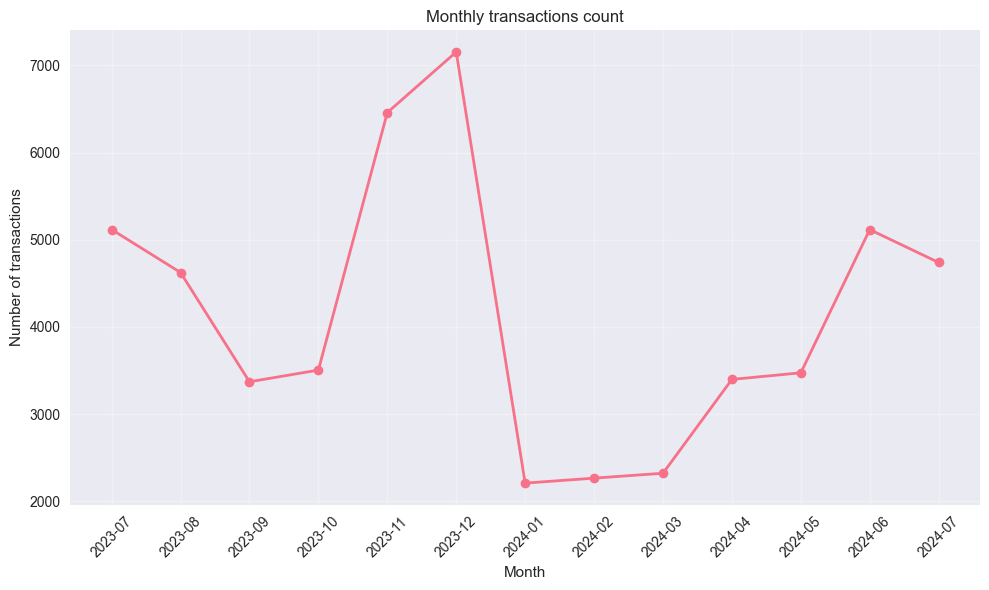

---------- Quarterly analysis ------------------------
Sales by Quarter: 
         total_revenue  total_units_sold  unique_customers
quarter                                                   
1           8268976.84             12281               985
2          14266384.77             21579              1000
3          20963605.31             32455               996
4          18574340.49             31050               994

Best performing quarter: Q3
Revenue: $20,963,605.31
Daily Sales Patterns: 
           total_sales  avg_transaction_value  transaction_count
day_name                                                        
Monday      6880807.07                1162.89               5917
Tuesday     7046838.59                1166.70               6040
Wednesday   6797715.84                1162.80               5846
Thursday    6917517.50                1166.53               5930
Friday      8930670.94                1165.43               7663
Saturday   12522297.00                113

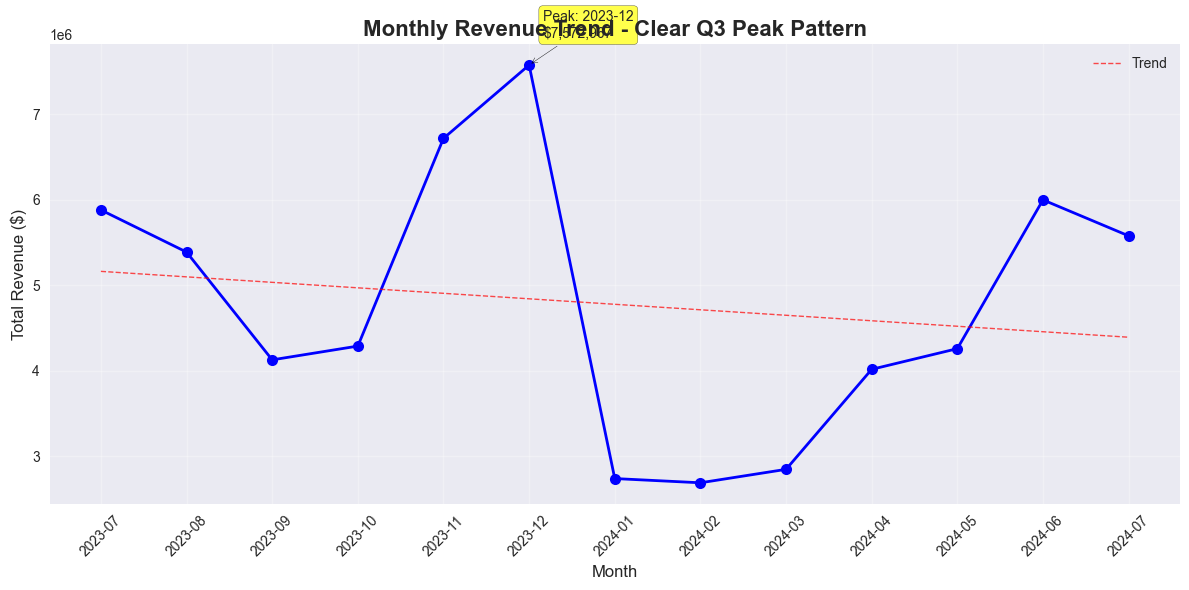

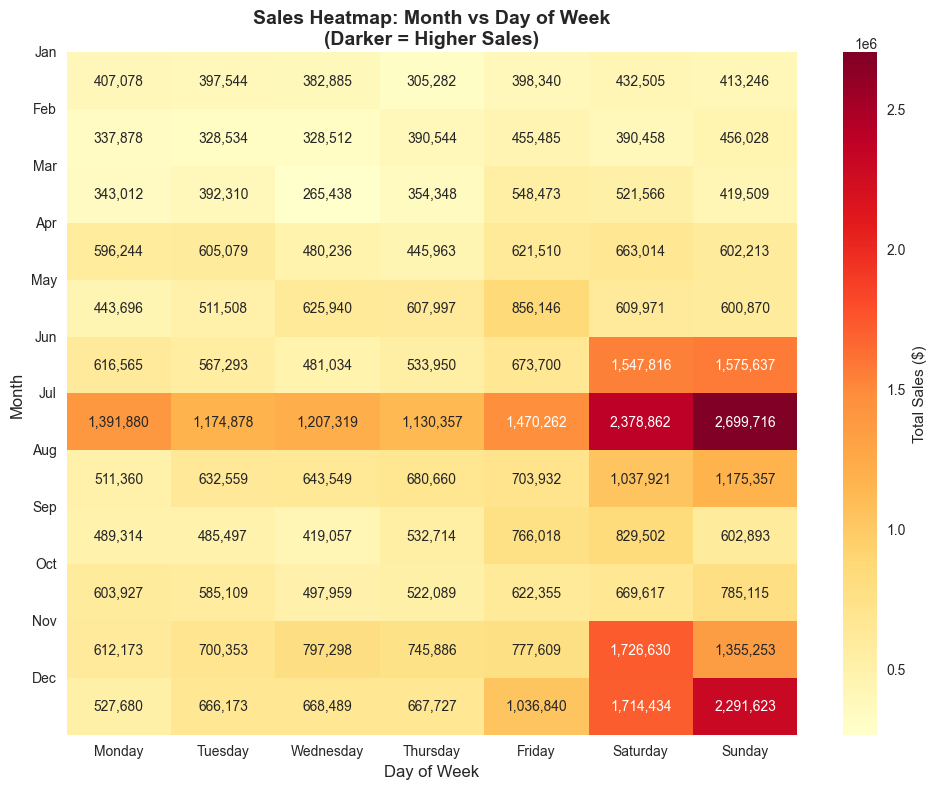

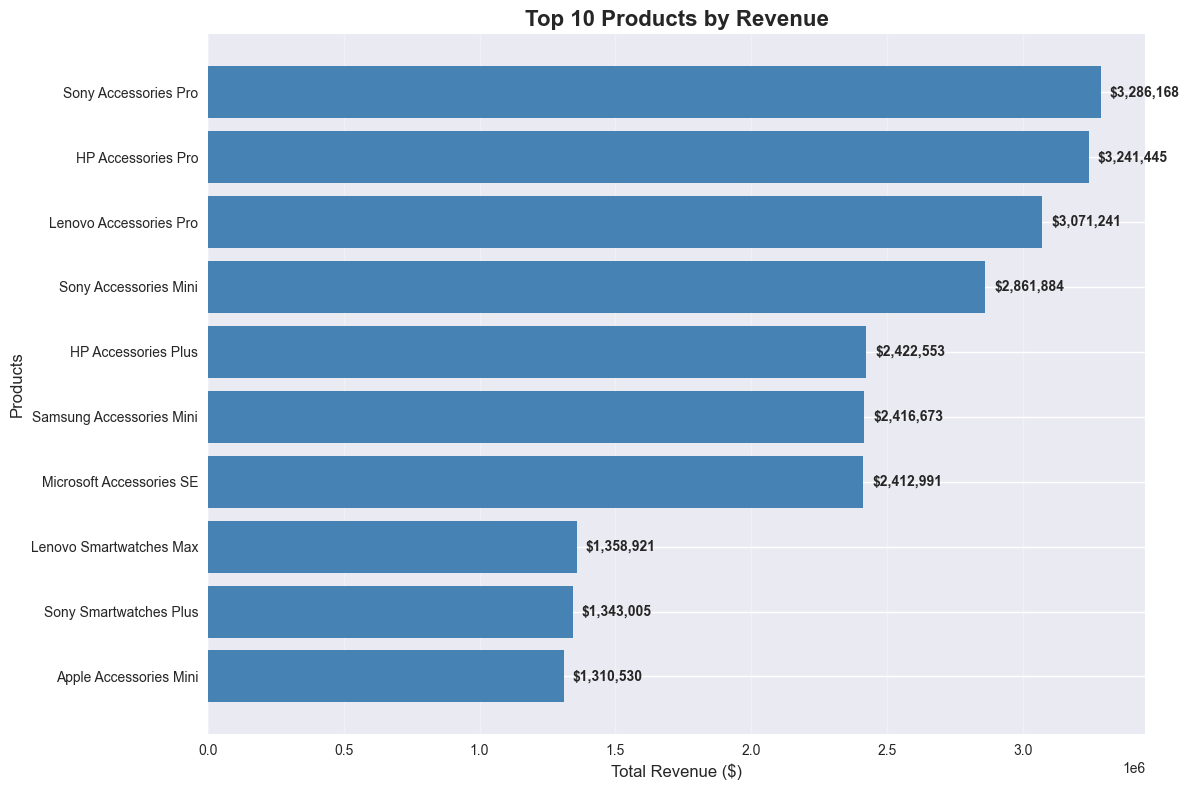

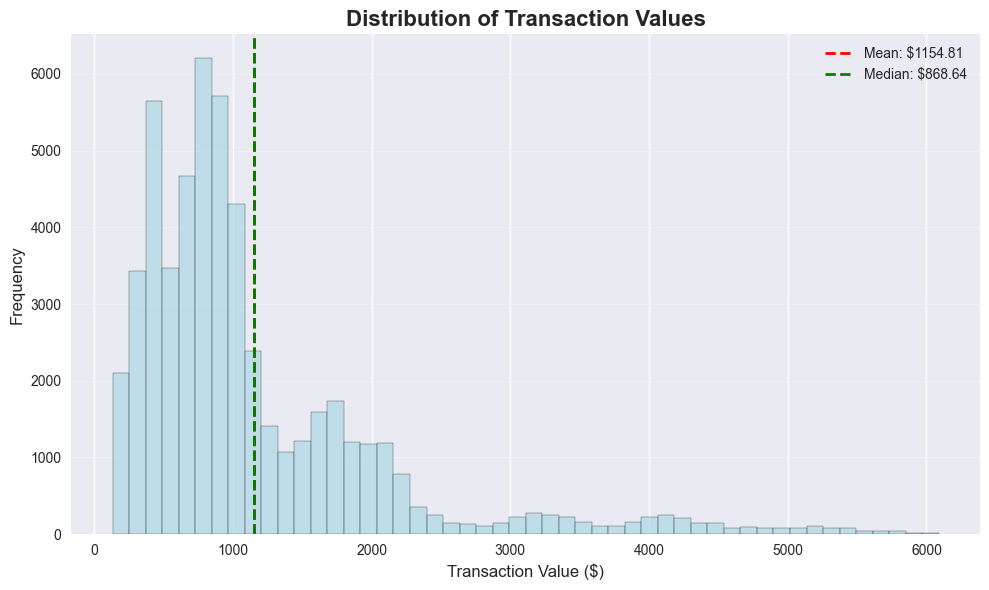

Transaction Statistics: 
Average transaction: $1154.8092612367911:.2f
Median transaction: $868.645:.2f
Highest transaction: $6088.35
Total transactions: 53,752


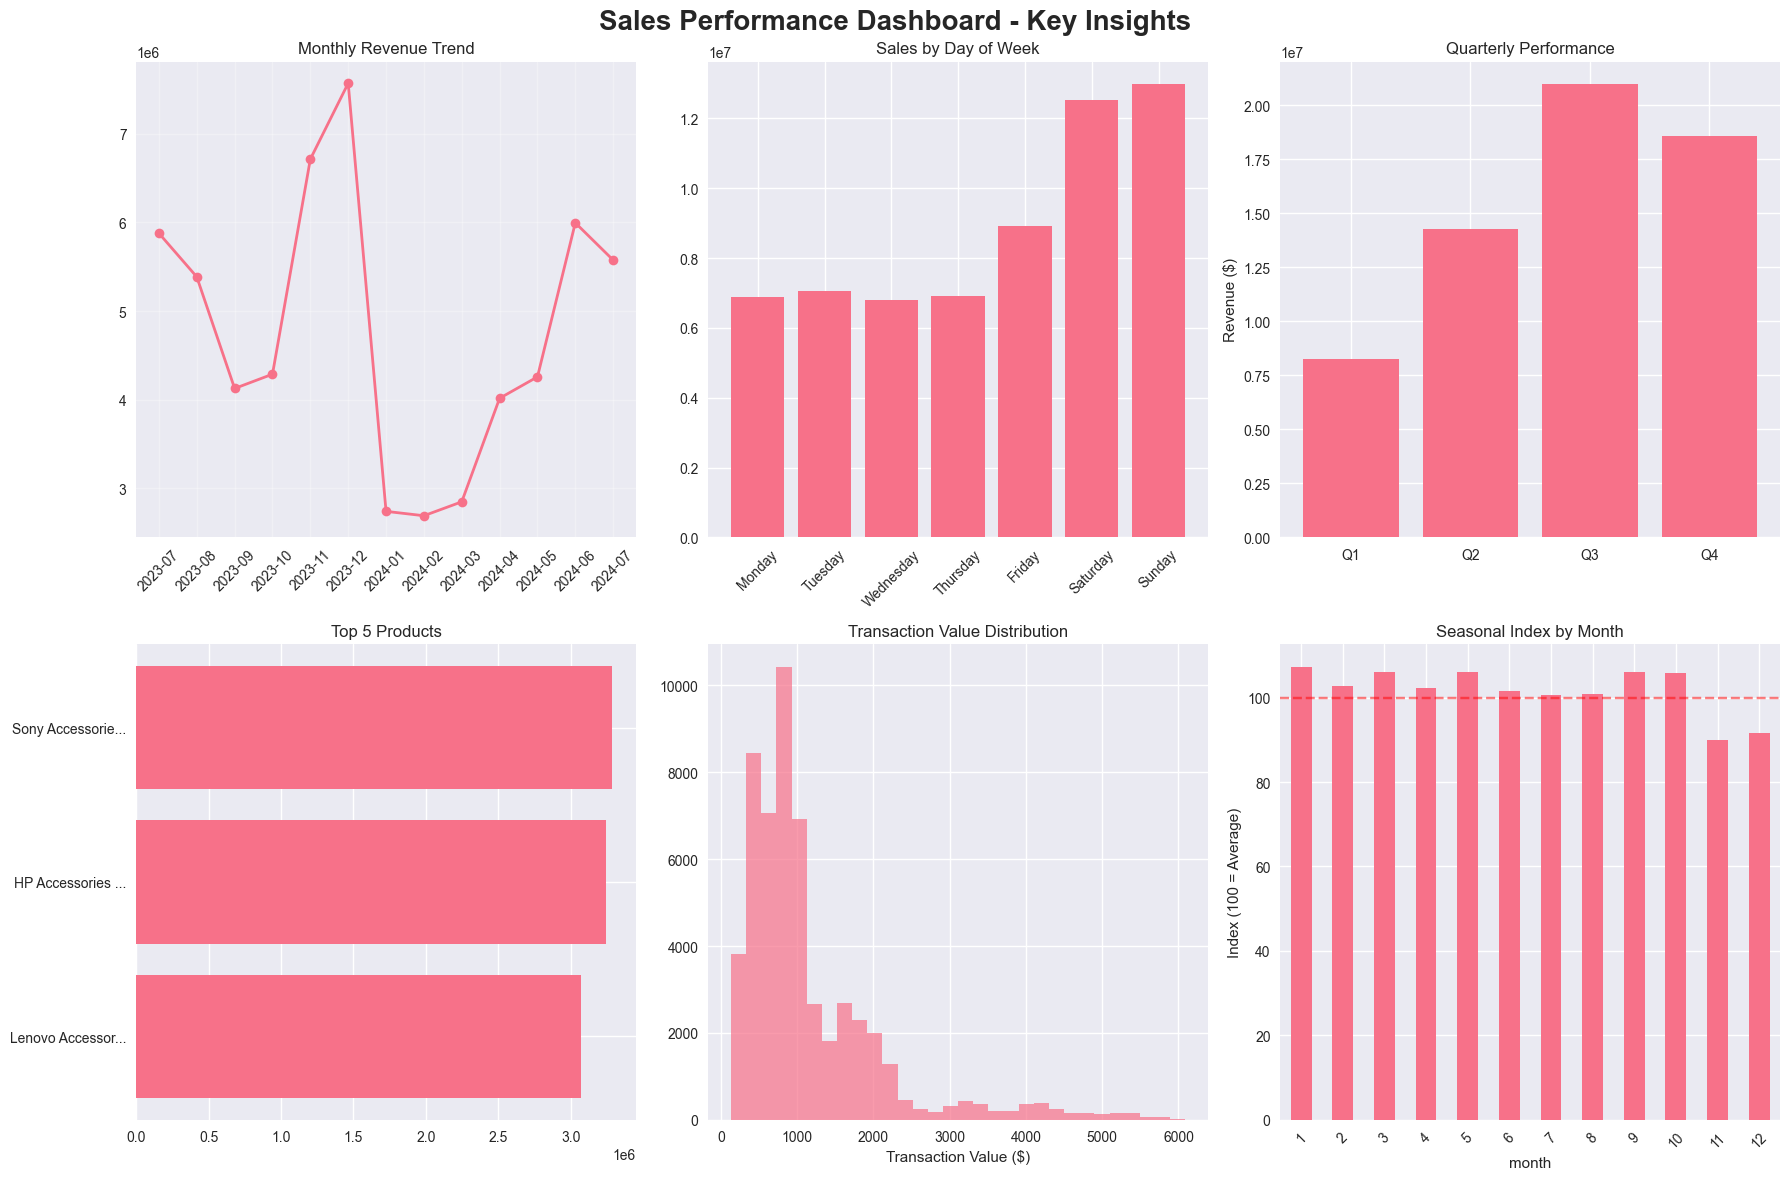

✓ Dashboard saved as PNG file!


<Figure size 800x550 with 0 Axes>

In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime

"""Loading data from our path"""
#Here, we are loading the data from our path (the directory)
df_sales = pd.read_csv('../data/raw/sales_data.csv', encoding='utf-8')
df_products = pd.read_csv('../data/raw/products.csv', encoding='utf-8')
df_customers = pd.read_csv('../data/raw/customers.csv', encoding='utf-8')

"""Basic exploration"""
#Exploring the data and the types of data that we have
print("Data shape: ", df_sales.shape) #columns and rows
print("\nData types: ") # this is telling us the data type (object, int, float etc...)
print(df_sales.dtypes) 
print(df_sales.head()) #Prints the first 5 rows 

#It's very important to convert all dates to datetime
df_sales['date'] = pd.to_datetime(df_sales['date'])

#we might wanna have the dates divided into days, months and quarters for better analysis
df_sales['year'] = df_sales['date'].dt.year
df_sales['month'] = df_sales['date'].dt.month
df_sales['day_of_week'] = df_sales['date'].dt.dayofweek
df_sales['quarter'] = df_sales['date'].dt.quarter
"""New dates columns already added"""

#Now, let's get some basic summary stats to test the waters
print("\nSummary Stats:")
print(df_sales.describe())



"""NEW SECTION: MONTHLY ANALYSIS"""

#plotting style with seaborn
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("********===== MONTHLY SALES ANALYSIS ========*********")


#here we are grouping everything by month and getting new info based on sum, mean and count
monthly_summary = df_sales.groupby(['year', 'month']).agg({
    'total_sales' : ['sum', 'mean', 'count'],
    'quantity' : 'sum',
    'customer_id' : 'nunique',
}).round(2)

# here we're gen columns for our total revenue etc...
monthly_summary.columns = ['total_revenue', 'avg_transaction', 'transaction_count', 'total_units', 'unique_customers']
monthly_summary = monthly_summary.reset_index() #resetting our data

monthly_summary['month_year'] = monthly_summary['year'].astype(str) + '-' + monthly_summary['month'].astype(str).str.zfill(2)

print("Monthly Summary: ")
print(monthly_summary)

#monthly growth calc
monthly_summary['avg_order_value'] = monthly_summary['total_revenue'] / monthly_summary['transaction_count']
monthly_summary['avg_units_per_transaction'] = monthly_summary['total_units'] / monthly_summary['transaction_count']
monthly_summary['revenue_growth'] = monthly_summary['total_revenue'].pct_change()*100
monthly_summary['transaction_growth'] = monthly_summary['transaction_count'].pct_change()*100

monthly_summary = monthly_summary.sort_values(['year', 'month'])


#customer stats
print("\nMonth-over-Month Growth: ")
print(monthly_summary[['month_year', 'revenue_growth', 'transaction_growth']].round(2))

monthly_summary.to_csv('../data/processed/monthly_summary_stats.csv', index= False)
print("Monthly summary saved!")

monthly_customer_stats = df_sales.groupby(['year', 'month']).agg({
    'customer_id': ['nunique', 'count']  # unique customers vs total transactions
}).round(2)

monthly_customer_stats.columns = ['unique_customers', 'total_transactions']
monthly_customer_stats['avg_transactions_per_customer'] = (
    monthly_customer_stats['total_transactions'] / 
    monthly_customer_stats['unique_customers']
).round(2)

print("Monthly Customer Statistics: ")
print(monthly_customer_stats.head())



# ************** VISUALIZATIONS AND PLOTS *********************
# PLOT: Monthly Revenue Trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_summary['month_year'], monthly_summary['total_revenue'], marker = 'o', linewidth = 2)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation = 45)
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()

#PLOT: Transactions over time

plt.figure(figsize=(10, 6))
plt.plot(monthly_summary['month_year'], monthly_summary['transaction_count'], marker = 'o', linewidth = 2)
plt.title('Monthly transactions count')
plt.xlabel('Month')
plt.ylabel('Number of transactions')
plt.xticks(rotation = 45)
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()




print('---------- Quarterly analysis ------------------------')
quarterly_sales = df_sales.groupby('quarter').agg({
    'total_sales': 'sum',
    'quantity': 'sum',
    'customer_id': 'nunique'
}).round(2)

quarterly_sales.columns = ['total_revenue', 'total_units_sold', 'unique_customers']

print("Sales by Quarter: ")
print(quarterly_sales)

#best quarter
best_quarter = quarterly_sales['total_revenue'].idxmax()
print(f"\nBest performing quarter: Q{best_quarter}")
print(f"Revenue: ${quarterly_sales.loc[best_quarter, 'total_revenue']:,.2f}")

#Which days are the bussiest of the week!

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_sales['day_name'] = df_sales['day_of_week'].map(day_mapping)

daily_patterns = df_sales.groupby('day_name').agg({
    'total_sales': ['sum', 'mean'],
    'customer_id': 'count'
}).round(2)

daily_patterns.columns = ['total_sales', 'avg_transaction_value', 'transaction_count']

daily_patterns = daily_patterns.reindex(day_names)

print("Daily Sales Patterns: ")
print(daily_patterns)

#bussiest day: 
busiest_day = daily_patterns['total_sales'].idxmax()
print(f"\nBussiest day: {busiest_day}")

#TOP SALE DAYS

daily_sales = df_sales.groupby('date')['total_sales'].sum().sort_values(ascending= False)

print("== TOP SALES DAYS ==")
print("Top highest sale days: ")
top_days = daily_sales.head(10)

for date, sales in top_days.items(): 
    day_name = date.strftime('%A')  # Get day of week name
    date_str = date.strftime('%Y-%m-%d')  # Format date nicely
    print(f"{date_str} ({day_name}): ${sales:,.2f}")


print("------------------------------Product Analysis-------------------------------")

top_products = df_sales.groupby(['product_id', 'product_name']).agg({
    'total_sales' : 'sum', 
    'quantity': 'sum'
}).sort_values('total_sales' ,ascending=False).head(10)

print('The 10 most productive products: ')
print(top_products)

top_by_qty = df_sales.groupby(['product_id', 'product_name']).agg({
    'quantity' : 'sum', 
    'total_sales' : 'sum'
}).sort_values('quantity', ascending=False).head(10)

print("Top 10 products by quantity sold: ")
print(top_by_qty)

#products with highest avergage selling price
avg_prices = df_sales.groupby(['product_id', 'product_name']).agg({
    'unit_price':'mean',
    'total_sales': 'sum',
}).sort_values('unit_price', ascending=False).head(10)

print("\nTop 10 highest-priced products: ")
print(avg_prices)


"""SEASONAL PATTERNS"""
print("====== Seasonal Patterns ======")
monthly_averages = df_sales.groupby('month')['total_sales'].mean()
overall_average = df_sales['total_sales'].mean()

seasonal_indices = ((monthly_averages/overall_average) * 100).round(1)

print("Seasonal Index by Month (100 = average):")
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for month_num, index in seasonal_indices.items(): 
    month_name = month_names[month_num - 1]
    if index > 100: 
        print(f"{month_name}: {index} (Above average)")
    else: 
        print( f"{month_name}: {index} (Below average)")

print("=== SAVING RESULTS ===")

# Save the key dataframes you created
quarterly_sales.to_csv('../data/processed/quarterly_analysis.csv')
daily_patterns.to_csv('../data/processed/daily_patterns.csv') 
top_products.to_csv('../data/processed/top_products_by_revenue.csv')
top_by_qty.to_csv('../data/processed/top_products_by_quantity.csv')

# Save the seasonal indices as a simple CSV
seasonal_df = pd.DataFrame({
    'month': range(1, 13),
    'month_name': month_names,
    'seasonal_index': seasonal_indices.values
})
seasonal_df.to_csv('../data/processed/seasonal_indices.csv', index=False)

print("✓ All analysis files saved!")
print("✓ Phase 2 Complete!")



print("=================== Visualization ======================")

plt.figure( figsize = (12, 6))

#plotting month-year against total revenue
plt.plot(monthly_summary['month_year'], monthly_summary['total_revenue'], marker = 'o', linewidth = 2, markersize= 8, color = 'blue' )

z = np.polyfit(range(len(monthly_summary)), monthly_summary['total_revenue'], 1)
p = np.poly1d(z)
plt.plot(monthly_summary['month_year'], p(range(len(monthly_summary))), "--", alpha = 0.7, color = 'red', linewidth = 1, label = 'Trend' )
plt.title('Monthly Revenue Trend - Clear Q3 Peak Pattern', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

#Highligthing the peak month
max_revenue_month = monthly_summary.loc[monthly_summary['total_revenue'].idxmax(), 'month_year']
max_revenue_value = monthly_summary['total_revenue'].max()
plt.annotate(f'Peak: {max_revenue_month}\n${max_revenue_value:,.0f}', 
             xy=(max_revenue_month, max_revenue_value),
             xytext=(10, 20), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', color='black'))

plt.tight_layout()
plt.show()


"""Seasonal Heat Map"""

heatmap_data = df_sales.groupby(['month', 'day_name'])['total_sales'].sum().unstack(fill_value = 0)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(columns=day_order)

#creating the heat map
plt.figure(figsize= (10, 8))
sns.heatmap(heatmap_data, 
            annot = True, 
            fmt = ',.0f', 
            cmap = 'YlOrRd', 
            cbar_kws = {'label':'Total Sales ($)'})
plt.title('Sales Heatmap: Month vs Day of Week\n(Darker = Higher Sales)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Add month names to y-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.yticks(range(12), month_names, rotation=0)

plt.tight_layout()
plt.show()


""""PRODUCTS HORIZONTAL BAR"""

top_10 = top_products.head(10).copy()

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_10)), top_10['total_sales'], color='steelblue')

for i, (idx, row) in enumerate(top_10.iterrows()): 
    plt.text(row['total_sales'] + max(top_10['total_sales'])*0.01, i, 
             f'${row["total_sales"]:,.0f}', 
             va='center', fontweight='bold')
# Set product names as y-axis labels

plt.title('Top 10 Products by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Products', fontsize=12)

#truncating the labels so the charts stay visible
product_names = [name[:30] + '...' if len(name) > 30 else name 
                 for name in top_10.index.get_level_values('product_name')]
plt.yticks(range(len(top_10)), product_names)

# Invert y-axis so highest is at top
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Sales Distribution Histogram

"""Sales Distribution Histogram"""

plt.figure(figsize=(10, 6))
plt.hist(df_sales['total_sales'], bins = 50, alpha = 0.7, color = 'lightblue', edgecolor = 'black')

#basic statistics needed
mean_sales = df_sales['total_sales'].mean()
median_sales = df_sales['total_sales'].median()

plt.axvline(mean_sales, color = 'red', linestyle='--', linewidth=2, label=f'Mean: ${mean_sales:.2f}')
plt.axvline(mean_sales, color = 'green', linestyle='--', linewidth=2, label=f'Median: ${median_sales:.2f}')

plt.title('Distribution of Transaction Values', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Value ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Transaction Statistics: ")
print(f"Average transaction: ${mean_sales}:.2f")
print(f"Median transaction: ${median_sales}:.2f")
print(f"Highest transaction: ${df_sales['total_sales'].max():.2f}")
print(f"Total transactions: {len(df_sales):,}")

"""Dashboard"""
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Sales Performance Dashboard - Key Insights', fontsize = 20, fontweight = 'bold')

#Chart 1: Monthly Trend
axes[0, 0].plot(monthly_summary['month_year'], monthly_summary['total_revenue'], 
                marker = 'o', linewidth=2)
axes[0, 0].set_title('Monthly Revenue Trend')
axes[0, 0].set_title('Monthly Revenue Trend')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

#Chart 2: Day of the Week
axes[0, 1].bar(daily_patterns.index, daily_patterns['total_sales'])
axes[0, 1].set_title('Sales by Day of Week')
axes[0, 1].tick_params(axis='x', rotation=45)

#Chart 3: Quarterly summary
axes[0, 2].bar(['Q1', 'Q2', 'Q3', 'Q4'], quarterly_sales['total_revenue'])
axes[0, 2].set_title('Quarterly Performance')
axes[0, 2].set_ylabel('Revenue ($)')

# Chart 4: Top 5 products (bottom left)
top_5 = top_products.head(5)
product_names_short = [name[:15] + '...' if len(name) > 15 else name 
                      for name in top_5.index.get_level_values('product_name')]
axes[1, 0].barh(product_names_short, top_5['total_sales'])
axes[1, 0].set_title('Top 5 Products')
axes[1, 0].invert_yaxis()

# Chart 5: Transaction distribution (bottom middle)
axes[1, 1].hist(df_sales['total_sales'], bins=30, alpha=0.7)
axes[1, 1].set_title('Transaction Value Distribution')
axes[1, 1].set_xlabel('Transaction Value ($)')

# Chart 6: Seasonal index (bottom right)
seasonal_indices.plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('Seasonal Index by Month')
axes[1, 2].set_ylabel('Index (100 = Average)')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].axhline(y=100, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Save the dashboard
plt.savefig('../exports/sales_dashboard_summary.png', dpi=300, bbox_inches='tight')
print("✓ Dashboard saved as PNG file!")